In [1]:
#%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
#import seaborn as sns
# File to Load (Remember to change these)
#city_data_to_load = "data/city_data.csv"
#ride_data_to_load = "data/ride_data.csv"

city_data_to_load = os.path.join("data","city_data.csv")
ride_data_to_load = os.path.join("data","ride_data.csv")


# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)



print(ride_data.head(2))
print("----")
print(city_data.head(2))


                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
----
           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban


In [2]:
#Drop any duplicate row in city

#total_rows = city_data.count
city_data=city_data.drop_duplicates('city')
total_rows = city_data.count
# No duplicates in city found
#total_rows
print(city_data.head())

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban


In [3]:
print(ride_data.head())

                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344


In [14]:
# Combine the data into a single dataset"
city_ride_df=pd.merge(city_data, ride_data, on='city',how="outer")
# Display the data table for preview
city_ride_df.head()


                city  driver_count   type                 date   fare  \
2250  South Jennifer             7  Rural  2018-04-01 09:32:45  21.63   
2251  South Jennifer             7  Rural  2018-03-07 19:10:13  48.79   

            ride_id  
2250  9135979586871  
2251  9730627367446  


In [33]:
# Create dataframe base on type Urban , SunUrban, Rural 

df_urban=city_ride_df.loc[city_ride_df['type']=='Urban']
#print(df_urban.head(2))
df_suburban=city_ride_df.loc[city_ride_df['type']=='Suburban']
#print(df_suburban.head(2))
df_rural=city_ride_df.loc[city_ride_df['type']=='Rural']
#print(df_rural.head(2))


#Average Fare ($) Per City
df_urban_avg=df_urban.groupby('city')['fare'].mean()
#df_urban_avg.head()
df_suburban_avg=df_suburban.groupby('city')['fare'].mean()
#df_urban_avg.head()
df_rural_avg=df_rural.groupby('city')['fare'].mean()
#df_rural_avg.head()


#Total Number of Drivers

df_urban_driver=df_urban.groupby('city')['driver_count'].first()
#df_urban_driver
df_suburban_driver=df_suburban.groupby('city')['driver_count'].first()
#df_suburban_driver
df_rural_driver=df_rural.groupby('city')['driver_count'].first()
#df_rural_driver
#df_rider_city_type.head()

#Total Number of Rides Per City

df_urban_count=df_urban.groupby('city')['ride_id'].count()
#df_urban_count
df_suburban_count=df_suburban.groupby('city')['ride_id'].count()
#df_suburban_count
df_rural_count=df_rural.groupby('city')['ride_id'].count()
#df_rural_count
#print(df_rural_driver)
#df_rural_avg.head()


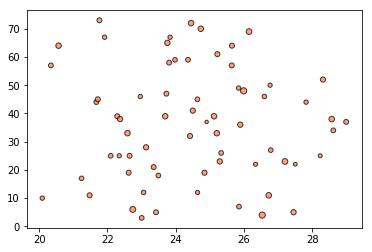

In [34]:
plt.scatter(df_urban_avg,df_urban_driver,s=df_urban_count,marker="o", facecolors="Coral",
            edgecolors="black",alpha=0.75, linewidth=1,label="Urban")




In [35]:
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

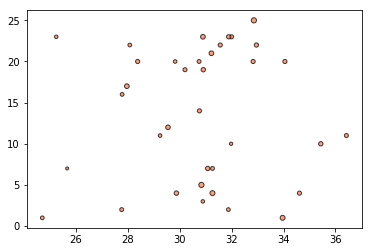

In [36]:

plt.scatter(df_suburban_avg,df_suburban_driver,s=df_suburban_count,marker="o", facecolors="Coral",
            edgecolors="black",alpha=0.75, linewidth=1,label="SubUrban")



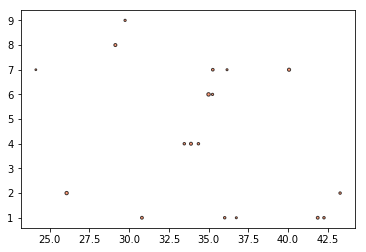

In [37]:
plt.scatter(df_rural_avg,df_rural_driver,s=df_rural_count,marker="o", facecolors="Coral",
            edgecolors="black",alpha=0.75, linewidth=1,label="Rural")